[Scalar(data=0.30128011798100635), Scalar(data=0.3038848429631691), Scalar(data=0.39483503905582457)]


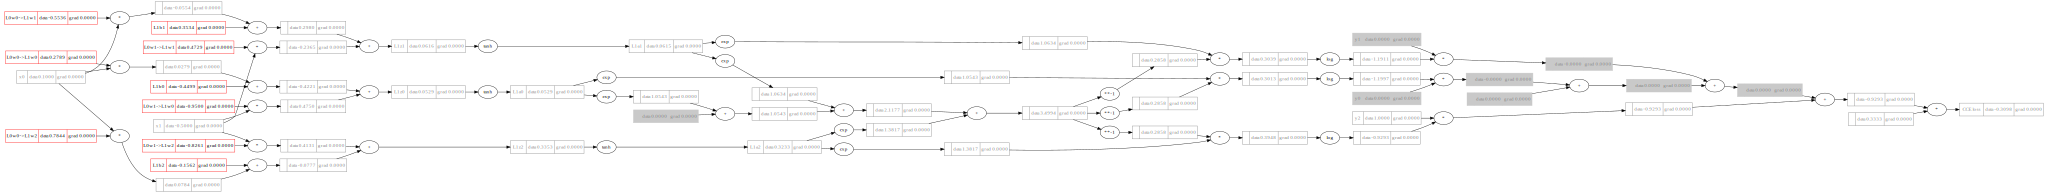

In [13]:
from candle.engine import Scalar, Vector
import candle.nn as nn
import candle.losses as losses
import candle.helpers as helpers
import random

random.seed(42)

mlp = nn.MLP(2, [3], 'tanh')

x = [0.1, -0.5]
x = Vector(x, label="x")
y = [0, 0, 1]
y = Vector(y, label='y')

y_logits = mlp(x)
y_preds = helpers.softmax(y_logits)
print(y_preds)

loss = losses.categorical_cross_entropy(y, y_preds)
helpers.draw_dot(loss, mlp.parameters())


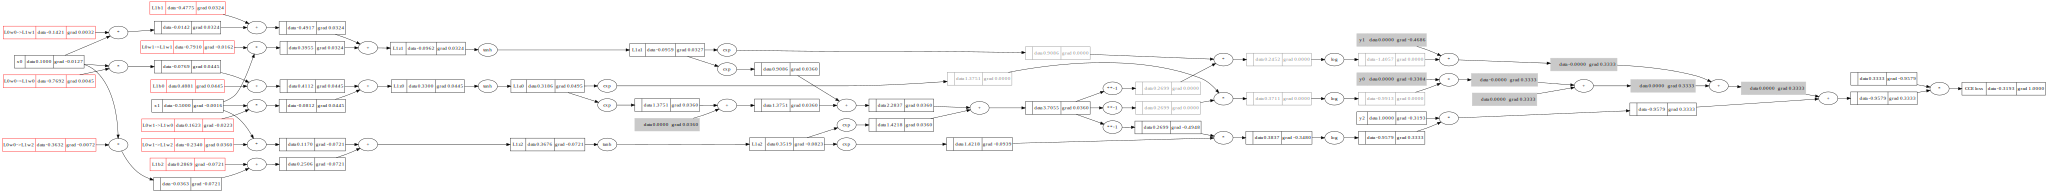

In [5]:
loss.backward()
helpers.draw_dot(loss, mlp.parameters())

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


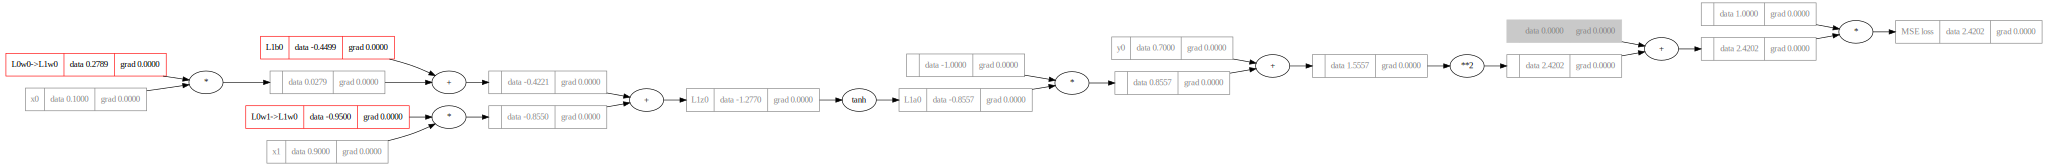

In [1]:
import candle.nn as nn
import candle.losses as losses
import candle.helpers as helpers
from candle.engine import Vector
import random

random.seed(42)

mlp = nn.MLP(2, [1])

x = [0.1, 0.9]
x = Vector(x, label="x")
y = [0.7]
y = Vector(y, label='y')

y_pred = mlp(x)
loss = losses.mean_squared_error(y, y_pred)    
helpers.draw_dot(loss, mlp.parameters())

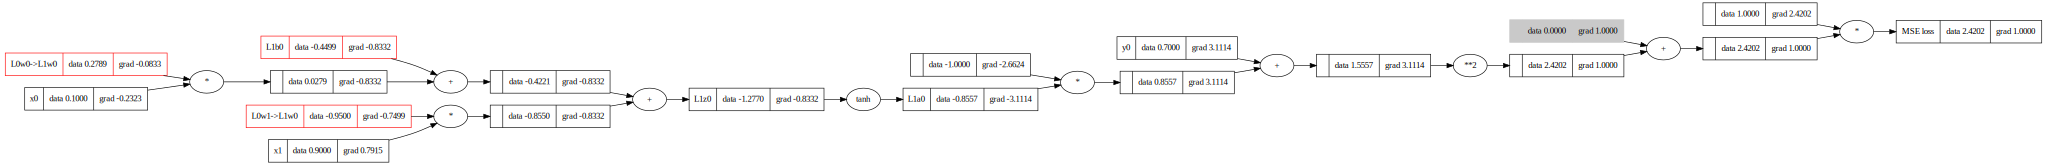

In [2]:
loss.backward()
helpers.draw_dot(loss, mlp.parameters())

In [3]:
#print(mlp.layers[0].neurons[0].w[0].__repr__())
mlp.parameters()

[Scalar(data=0.020650745585947705, label=L0w0-\>L1w0),
 Scalar(data=0.6067512157925414, label=L0w1-\>L1w0),
 Scalar(data=0.7863552307373063, label=L0w2-\>L1w0),
 Scalar(data=-0.803213600116196, label=L1b0),
 Scalar(data=-0.4282267208897921, label=L0w0-\>L1w1),
 Scalar(data=0.6199938109783609, label=L0w1-\>L1w1),
 Scalar(data=-0.7248414701977706, label=L0w2-\>L1w1),
 Scalar(data=-0.6172605044755441, label=L1b1),
 Scalar(data=-0.016149602011334974, label=L1w0-\>L2w0),
 Scalar(data=0.9678447459818083, label=L1w1-\>L2w0),
 Scalar(data=0.7762743864549759, label=L2b0),
 Scalar(data=0.44228532599132064, label=L1w0-\>L2w1),
 Scalar(data=-0.07962619470155019, label=L1w1-\>L2w1),
 Scalar(data=-0.4710870921650159, label=L2b1),
 Scalar(data=0.0703198608788762, label=L1w0-\>L2w2),
 Scalar(data=-0.23349594429915888, label=L1w1-\>L2w2),
 Scalar(data=-0.5099241610534051, label=L2b2)]

In [3]:
for epoch in range(100):

    #forward pass
    y_pred = mlp(x)
    loss = losses.mean_squared_error(y, y_pred)

    # backward pass
    loss.backward()
    for p in mlp.parameters():
        p.data += -0.1 * p.grad

    print(epoch, loss.data)

0 2.4201818653950182
1 2.1035128682535027
2 1.2397966799241784
3 0.08673275429296155
4 0.03353303342533667
5 0.07919553167741233
6 0.08829710825996367
7 0.08973905082987538
8 0.08996018237396249
9 0.08999392826068121
10 0.089999074219713
11 0.08999985884502384
12 0.08999997847795883
13 0.08999999671851391
14 0.08999999949966872
15 0.08999999992371405
16 0.08999999998836859
17 0.08999999999822658
18 0.08999999999972964
19 0.0899999999999588
20 0.08999999999999377
21 0.0899999999999991
22 0.0899999999999999
23 0.09000000000000002
24 0.09000000000000002
25 0.09000000000000002
26 0.09000000000000002
27 0.09000000000000002
28 0.09000000000000002
29 0.09000000000000002
30 0.09000000000000002
31 0.09000000000000002
32 0.09000000000000002
33 0.09000000000000002
34 0.09000000000000002
35 0.09000000000000002
36 0.09000000000000002
37 0.09000000000000002
38 0.09000000000000002
39 0.09000000000000002
40 0.09000000000000002
41 0.09000000000000002
42 0.09000000000000002
43 0.09000000000000002
44 0.0

In [4]:
y_pred

[Scalar(data=1.0, label=L1a0)]

In [9]:
mlp.layers[0].neurons[0].w[0].grad

AttributeError: 'float' object has no attribute 'dtype'